### Import packages and define directories

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from complexity import complexityBounds

from matplotlib.colors import LogNorm
from mpl_settings import *

output_dir = '../output'  ## Directory with H D C files

### Compute theoretical bounds in the H - C plane

In [2]:
N = 120
H_range = np.arange(0.001, 1.0, 0.01)
Cmin_values, Cmax_values = complexityBounds(N, H_range)

/home/nalmeira/medyfinol/code/complexity.py:88: RuntimeWarning: invalid value encountered in log2
  rhm = ( x*np.log2(x) + (1-x)*np.log2( (1-x)/(N-n-1) ) ) / np.log2(N)


### Read analyzed series

In [23]:
properties = {}
for file_name in os.listdir(output_dir):
    props = np.loadtxt(output_dir + '/' + file_name)
    version = int(file_name.split('v')[1].split('.')[0])
    properties[version] = props
    
mean_C_values = {}
for version, props in properties.items():
    mean_C = np.mean(props[:,2])
    mean_C_values[version] = mean_C

### Plane H - C plot

For each series of ten agents, plot the corresponding ten pairs of values (H, C). The color of the ten points is givent by the mean of the ten C values.

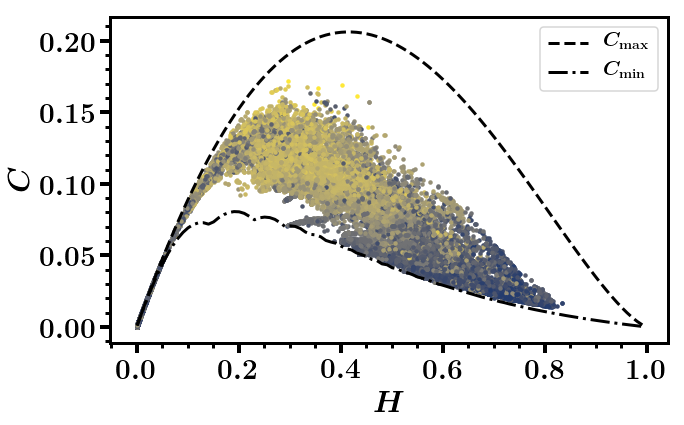

In [24]:
colormap = plt.get_cmap('cividis')

plt.figure(figsize=(10, 6))
plt.plot(H_range, Cmax_values, '--', color='k', label=r'$C_{\mathrm{max}}$')
plt.plot(H_range, Cmin_values, '-.', color='k', label=r'$C_{\mathrm{min}}$')

for version, props in properties.items():
    mean_C = mean_C_values[version]
    norm_mean_C = mean_C / max(mean_C_values.values())
    for (H, D, C) in props:
        color = colormap(norm_mean_C)
        plt.scatter(H, C, marker='.', color=color)

plt.xlabel(r'$H$')
plt.ylabel(r'$C$')
plt.legend(loc='best', fontsize=20)
plt.savefig('../figs/H_vs_C.png')
plt.savefig('../figs/H_vs_C.eps')
plt.savefig('../figs/H_vs_C.pdf')
plt.show()

### Compute histograms of complexity

In [17]:
## Mean over the ten agents
mean_H_values = [] 
mean_D_values = []
mean_C_values = []

## All values
H_values = [] 
D_values = []
C_values = []

## Values only for the first agent
H_values_0 = [] 
D_values_0 = []
C_values_0 = []

for props in properties.values():

    mean_H_values.append(np.mean(props[:,0]))
    mean_D_values.append(np.mean(props[:,1]))
    mean_C_values.append(np.mean(props[:,2]))
    
    H_values_0.append(props[0,0])
    D_values_0.append(props[0,1])
    C_values_0.append(props[0,2])
    
    for (H, D, C) in props:
        H_values.append(H)
        D_values.append(D)
        C_values.append(C)

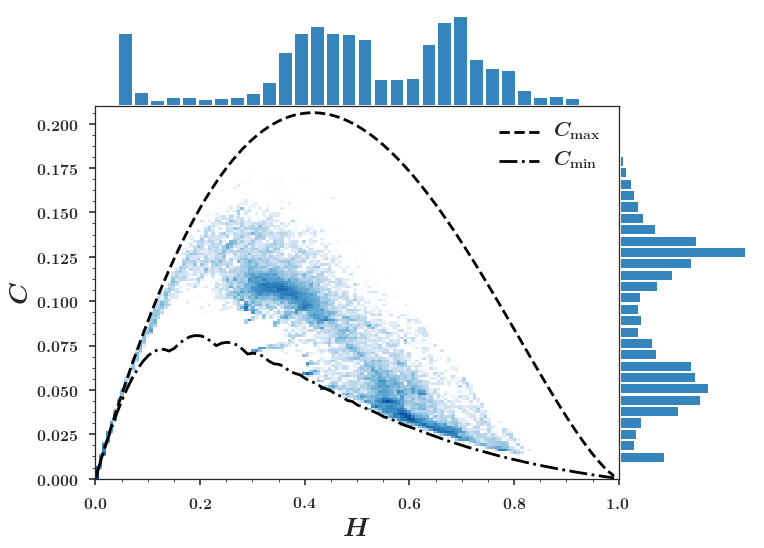

In [138]:
from matplotlib import gridspec
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])

colormap = plt.get_cmap('Blues')

fig = plt.figure(figsize=(11, 8))
ax = plt.subplot(gs[1, 0])
ax.hist2d(H_values, C_values, bins=120, cmap=colormap, norm=LogNorm())
#ax.hexbin(H_values, C_values, bins=50, cmap=colormap, norm=LogNorm())
#sns.kdeplot(H_values, C_values, shade=True, shade_lowest=False, cmap=colormap, ax=ax)

ax.plot(H_range, Cmax_values, '--', color='k', label=r'$C_{\mathrm{max}}$')
ax.plot(H_range, Cmin_values, '-.', color='k', label=r'$C_{\mathrm{min}}$')

ax.set_xlabel(r'$H$', fontsize=26)
ax.set_ylabel(r'$C$', fontsize=26)
ax.legend(loc=1, fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.21)

#Create Y-marginal (right)
axr = plt.subplot(gs[1, 1], frameon=False, xticks=[], yticks=[] ) #xlim=(0, 1), ylim = (ymin, ymax) xticks=[], yticks=[]
axr.hist(C_values, bins=30, color=colors[0], orientation='horizontal', rwidth=0.8, density=True, alpha=0.9)

#Create X-marginal (top)
axt = plt.subplot(gs[0,0], frameon = False, yticks=[], xticks=[])#, , ) #xlim = (xmin, xmax), ylim=(0, 1)
axt.hist(H_values, bins=30, color=colors[0], rwidth=0.8, density=True, alpha=0.9)

fig.tight_layout(w_pad=-0.8, h_pad=-0.6)
#plt.savefig('../figs/H_vs_C_v2.png')
#plt.savefig('../figs/H_vs_C_v2.eps')
#plt.savefig('../figs/H_vs_C_v2.pdf')
plt.show()

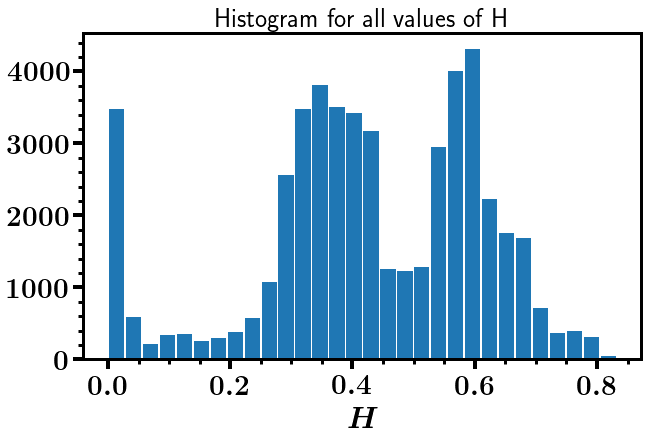

In [18]:
plt.figure(figsize=(10,6))
plt.hist(H_values, bins=30, density=False, rwidth=0.9)
plt.xlabel(r'$H$')
plt.title('Histogram for all values of H', fontsize=26)
plt.show()

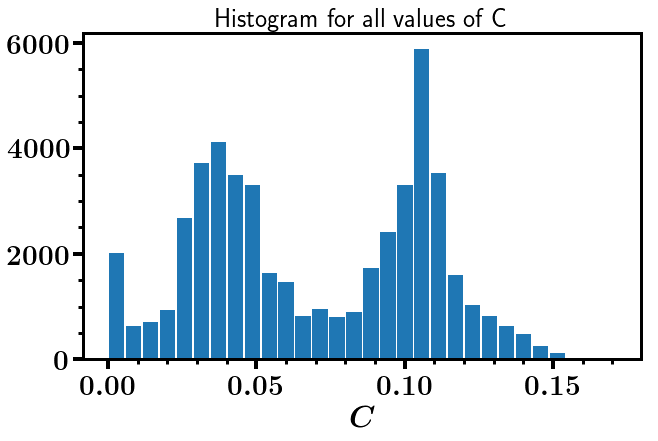

In [19]:
plt.figure(figsize=(10,6))
plt.hist(C_values, bins=30, density=False, rwidth=0.9)
plt.xlabel(r'$C$')
plt.title('Histogram for all values of C', fontsize=26)
plt.show()

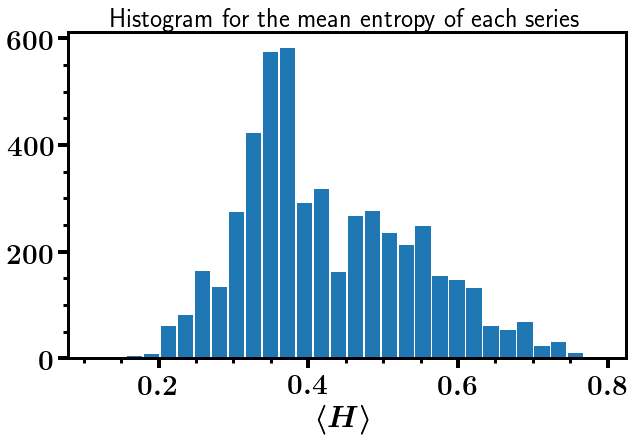

In [20]:
plt.figure(figsize=(10,6))
plt.hist(mean_H_values, bins=30, density=False, rwidth=0.9)
plt.xlabel(r'$\langle H \rangle$')
plt.title('Histogram for the mean entropy of each series', fontsize=26)
plt.show()

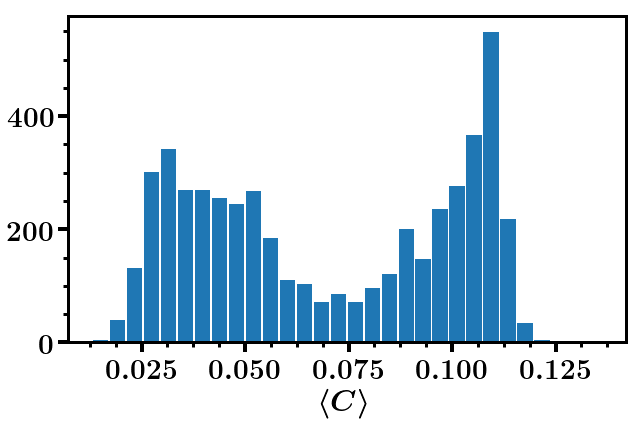

In [21]:
plt.figure(figsize=(10,6))
plt.hist(mean_C_values, bins=30, density=False, rwidth=0.9)
plt.xlabel(r'$\langle C \rangle$')
#plt.title('Histogram for the mean complexity of each series', fontsize=26)
plt.savefig('../figs/mean_C_histogram.png')
plt.savefig('../figs/mean_C_histogram.pdf')
plt.savefig('../figs/mean_C_histogram.eps')
plt.show()